In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data_brut = pd.read_csv('/Users/thesard/Doctorat/These2018/ISEP/Developpements/EspaceIntelliJ/LearningAllInPython/Learning_IHM_Features/datasets/imported_datasets/shuttle-unsupervised-ad_2019-06-14 17:33:02.493755.csv', header=None, index_col=None)
X = data_brut[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y_brut = data_brut[[9]]
data_brut.describe()

,0,1,2,3,4,5,6,7,8
count,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000,46464.000000
mean,44.775482,-0.712509,84.834108,0.279291,38.652763,2.289708,40.070334,46.180419,6.299888
std,8.753404,44.218007,8.731175,37.317203,15.902506,177.518356,10.969455,17.052467,15.005878
min,27.000000,-4475.000000,21.000000,-3939.000000,-188.000000,-12809.000000,-26.000000,-353.000000,-356.000000
25%,37.000000,0.000000,79.000000,0.000000,34.000000,-4.000000,34.000000,35.000000,0.000000
50%,43.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,41.000000,2.000000
75%,49.000000,0.000000,87.000000,0.000000,46.000000,5.000000,43.000000,52.000000,2.000000
max,123.000000,1963.000000,149.000000,3830.000000,436.000000,15164.000000,105.000000,270.000000,266.000000


In [2]:
#X.describe()

In [3]:
y_transform = y_brut
#y_transform.replace('o', -1)
#y_transform.replace('n', 1)
y_transform = np.where(y_transform=='o',-1,1)
#y_transform

In [4]:
y_outliers = data_brut[data_brut[9] == "o"]
len(y_outliers)

878

In [5]:
y_transform_outliers = y_transform[y_transform == -1]
len(y_transform_outliers)

878

In [6]:
y_normals = data_brut[data_brut[9] == "n"]
len(y_normals)

45586

In [7]:
y_transform_normals = y_transform[y_transform == 1]
len(y_transform_normals)

45586

In [8]:
len(y_outliers) + len(y_normals)

46464

In [9]:
len(y_transform_outliers) + len(y_transform_normals)

46464

In [10]:
#RandomizedSearchCV took 409.71 seconds for 20 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.001 (std: 0.002)
#Parameters: {'verbose': 0, 'random_state': None, 'n_jobs': None, 'n_estimators': 136, 'max_samples': 'auto', 'max_features': 4, 'contamination': 0.131955, 'bootstrap': False, 'behaviour': 'new'}

#Model with rank: 2
#Mean validation score: 0.001 (std: 0.002)
#Parameters: {'verbose': 0, 'random_state': None, 'n_jobs': None, 'n_estimators': 199, 'max_samples': 'auto', 'max_features': 1, 'contamination': 0.10659500000000001, 'bootstrap': False, 'behaviour': 'new'}

#Model with rank: 3
#Mean validation score: 0.001 (std: 0.002)
#Parameters: {'verbose': 0, 'random_state': None, 'n_jobs': None, 'n_estimators': 179, 'max_samples': 'auto', 'max_features': 7, 'contamination': 0.120586, 'bootstrap': False, 'behaviour': 'new'}

#RandomizedSearchCV took 699.50 seconds for 20 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.001 (std: 0.001)
#Parameters: {'verbose': 0, 'random_state': None, 'n_jobs': None, 'n_estimators': 119, 'max_samples': 46464, 'max_features': 1, 'contamination': 0.328901, 'bootstrap': False, 'behaviour': 'new'}

#Model with rank: 2
#Mean validation score: 0.000 (std: 0.001)
#Parameters: {'verbose': 0, 'random_state': None, 'n_jobs': None, 'n_estimators': 179, 'max_samples': 46464, 'max_features': 3, 'contamination': 0.135514, 'bootstrap': False, 'behaviour': 'new'}

#Model with rank: 2
#Mean validation score: 0.000 (std: 0.001)
#Parameters: {'verbose': 0, 'random_state': None, 'n_jobs': None, 'n_estimators': 123, 'max_samples': 46464, 'max_features': 2, 'contamination': 0.12194100000000001, 'bootstrap': False, 'behaviour': 'new'}

from sklearn.ensemble import IsolationForest

behaviour = 'new'
bootstrap = False
contamination = 0.328901
max_features = 1
max_samples = 46464
n_estimators = 119
n_jobs = None #= 1 processor and -1 = All processors
random_state = None
verbose = 0

#func = IsolationForest(behaviour=behaviour, bootstrap=bootstrap, contamination=contamination, 
#                         max_features=max_features, max_samples=max_samples, n_estimators=n_estimators,
#                         n_jobs=n_jobs, random_state=random_state, verbose = verbose)
func = IsolationForest(behaviour=behaviour, bootstrap=bootstrap, contamination=contamination, 
                         max_features=max_features, max_samples=max_samples, n_estimators=n_estimators,
                         n_jobs=n_jobs, random_state=random_state, verbose = verbose)

In [11]:
func.fit(X)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.328901,
        max_features=1, max_samples=46464, n_estimators=119, n_jobs=None,
        random_state=None, verbose=0)

In [12]:
y_pred = func.predict(X)
y_pred

array([-1, -1, -1, ...,  1,  1, -1])

In [13]:
#X_scores = func.negative_outlier_factor_
#X_scores

In [14]:
#   TP  FN
#   FP  TN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_transform, y_pred)

array([[  878,     0],
       [14404, 31182]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_transform, y_pred)

1.0

In [16]:
recall_score(y_transform, y_pred)

0.6840257973939368

In [17]:
from sklearn.metrics import f1_score
f1_score(y_transform, y_pred)

0.8123697373905794

In [18]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_transform, y_pred)

In [19]:
precisions

array([0.98110365, 1.        , 1.        ])

In [20]:
recalls

array([1.       , 0.6840258, 0.       ])

In [21]:
thresholds

array([-1,  1])

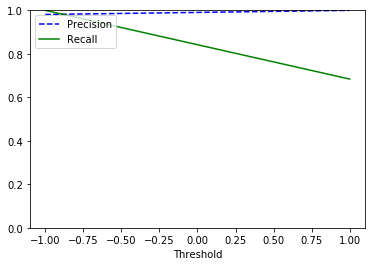

In [22]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_transform, y_pred)

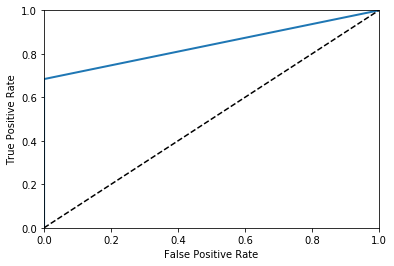

In [24]:
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [25]:
X_outliers = data_brut[y_pred == -1]
#X_outliers
len(X_outliers)

15282

In [26]:
X_normals = data_brut[y_pred == 1]
#X_normals
len(X_normals)

31182

In [27]:
len(X_normals) + len(X_outliers)

46464

In [28]:
FP = X_normals[X_normals[9] == "o"]
len(FP)

0

In [29]:
VP = X_normals[X_normals[9] == "n"]
len(VP)

31182

In [30]:
VN = X_outliers[X_outliers[9] == "o"]
len(VN)

878

In [31]:
FN = X_outliers[X_outliers[9] == "n"]
len(FN)

14404

In [32]:
precision_O = len(VN)/(len(FN) + len(VN))
precision_O

0.05745321293024473

In [33]:
precision_N = len(VP)/(len(VP) + len(FP))
precision_N

1.0

In [34]:
rappel_O = len(VN)/(len(FP) + len(VN))
rappel_O

1.0

In [35]:
rappel_N = len(VP)/(len(VP) + len(FN))
rappel_N

0.6840257973939368